# Ciência e Python: SciPy

- Gabriel Wendell Celestino Rocha
- 30 de novembro de 2022

---

## 0. Preliminares

### 0.1 O que é o `SciPy`?

- `SciPy`: *Scientific Python*

- Criado por Travis Olliphant, o criador do `NumPy`.

- O `SciPy` é uma biblioteca de computação científica que usa o NumPy por baixo.

- Assim como o `NumPy`, o `SciPy` é de código aberto para que possamos usá-lo livremente.

- Ele fornece mais funções de utilidade para otimização, estatísticas e processamento de sinal.

### 0.2 Por quê usar o `SciPy`?

- Se o `SciPy` usa o `NumPy` por baixo, por que não podemos simplesmente usar o `NumPy`?

- O `SciPy` otimizou e adicionou funções que são frequentemente usadas no `NumPy` e na Ciência de Dados.

---

## 1. Álgebra Linear

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

O módulo `scipy.linalg` fornece operações de álgebra linear padrão, contando com uma implementação eficiente subjacente.

- Determinante de uma matriz quadrada:

In [2]:
from scipy import linalg

arr1 = np.array([[1, 2],
                [3, 4]])

arr2 = np.array([[3, 2],
                [6, 4]])

print('det(arr1) =', linalg.det(arr1))
print('\ndet(arr2) = ', linalg.det(arr2))

det(arr1) = -2.0

det(arr2) =  0.0


- Inversa de uma matriz quadrada:

In [3]:
iarr1 = linalg.inv(arr1)
iarr1

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [4]:
iarr2 = linalg.inv(arr2)
iarr2

LinAlgError: singular matrix

Calcular a inversa de uma matriz singular (ou seja, que possui determinante nulo) retornará `LinAlgError`:

- *Singular Value Decomposition* (SVD):

In [5]:
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
uarr, spec, vharr = linalg.svd(arr)

print('uarr =', uarr)
print('\nspec =', spec)
print('\nvharr =', vharr)

uarr = [[-0.1617463  -0.98659196  0.02178164]
 [-0.47456365  0.09711667  0.87484724]
 [-0.86523261  0.13116653 -0.48390895]]

spec = [14.88982544  0.45294236  0.29654967]

vharr = [[-0.45513179 -0.54511245 -0.70406496]
 [ 0.20258033  0.70658087 -0.67801525]
 [-0.86707339  0.45121601  0.21115836]]


A matriz original pode ser recomposta pela multiplicação da matriz das saídas de `svd` com `np.dot`:

In [6]:
sarr = np.diag(spec)
svd_mat = uarr.dot(sarr).dot(vharr)

print('sarr =', sarr)
print('\nSVD =', svd_mat)

sarr = [[14.88982544  0.          0.        ]
 [ 0.          0.45294236  0.        ]
 [ 0.          0.          0.29654967]]

SVD = [[1. 1. 2.]
 [3. 4. 5.]
 [6. 7. 9.]]


---

## 2. Interpolação

O módulo `scipy.interpolate` é útil para ajustar uma função a partir de dados experimentais e, assim, avaliar pontos onde não existe nenhuma medida. O módulo é baseado nas sub-rotinas `FITPACK` do Fortran.

- Simulando dados experimentais:

In [7]:
measured_time = np.linspace(0, 1, 50)
noise = (np.random.random(50)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise
measures

array([-0.06540556,  0.12684359,  0.16605979,  0.30289721,  0.5754505 ,
        0.57833169,  0.72901288,  0.86195621,  0.79452485,  0.89380815,
        0.93471353,  1.06328361,  1.00484834,  0.93768365,  0.88576154,
        0.99140365,  0.91814046,  0.75628443,  0.64694403,  0.68159836,
        0.60956303,  0.43013164,  0.23189952,  0.13486814,  0.15442246,
        0.00184424, -0.24829936, -0.40392349, -0.52685782, -0.6292135 ,
       -0.72364813, -0.65907987, -0.90038035, -0.87042245, -1.0290732 ,
       -1.00755738, -0.93278398, -1.09728428, -1.02008464, -0.99064505,
       -0.8715677 , -0.90194031, -0.79072404, -0.64609221, -0.54999555,
       -0.47588944, -0.37840124, -0.22469965, -0.09349883, -0.05597587])

Usando o método `scipy.interpolate.interp1d` podemos construir uma função de interpolação linear:

In [8]:
from scipy.interpolate import interp1d

linear_interp = interp1d(measured_time, measures)
linear_interp

Então o resultado pode ser avaliado no momento de interesse:

In [9]:
interpolation_time = np.linspace(0, 1, 50)
linear_results = linear_interp(interpolation_time)
linear_results

array([-0.06540556,  0.12684359,  0.16605979,  0.30289721,  0.5754505 ,
        0.57833169,  0.72901288,  0.86195621,  0.79452485,  0.89380815,
        0.93471353,  1.06328361,  1.00484834,  0.93768365,  0.88576154,
        0.99140365,  0.91814046,  0.75628443,  0.64694403,  0.68159836,
        0.60956303,  0.43013164,  0.23189952,  0.13486814,  0.15442246,
        0.00184424, -0.24829936, -0.40392349, -0.52685782, -0.6292135 ,
       -0.72364813, -0.65907987, -0.90038035, -0.87042245, -1.0290732 ,
       -1.00755738, -0.93278398, -1.09728428, -1.02008464, -0.99064505,
       -0.8715677 , -0.90194031, -0.79072404, -0.64609221, -0.54999555,
       -0.47588944, -0.37840124, -0.22469965, -0.09349883, -0.05597587])

Uma interpolação cúbica também pode ser selecionada fornecendo o argumento opcional `kind`:

In [10]:
cubic_interp = interp1d(measured_time, measures, kind = 'cubic')
cubic_results = cubic_interp(interpolation_time)
cubic_results

array([-0.06540556,  0.12684359,  0.16605979,  0.30289721,  0.5754505 ,
        0.57833169,  0.72901288,  0.86195621,  0.79452485,  0.89380815,
        0.93471353,  1.06328361,  1.00484834,  0.93768365,  0.88576154,
        0.99140365,  0.91814046,  0.75628443,  0.64694403,  0.68159836,
        0.60956303,  0.43013164,  0.23189952,  0.13486814,  0.15442246,
        0.00184424, -0.24829936, -0.40392349, -0.52685782, -0.6292135 ,
       -0.72364813, -0.65907987, -0.90038035, -0.87042245, -1.0290732 ,
       -1.00755738, -0.93278398, -1.09728428, -1.02008464, -0.99064505,
       -0.8715677 , -0.90194031, -0.79072404, -0.64609221, -0.54999555,
       -0.47588944, -0.37840124, -0.22469965, -0.09349883, -0.05597587])

Vamos dar uma visualizada:

In [11]:
%matplotlib inline
def sm_style():
    # plt.style.use('dark_background')
    plt.grid(True, linestyle = ':', color = '0.50')
    plt.rcParams['font.family'] = 'monospace'
    plt.rcParams['font.size'] = 15
    plt.minorticks_on()
    plt.tick_params(axis = 'both', which = 'minor', direction = "in",
                        top = True, right = True, length = 5, width = 1, labelsize = 15)
    plt.tick_params(axis = 'both', which = 'major', direction = "in",
                        top = True, right = True, length = 8, width = 1, labelsize = 15)

In [12]:
def style():
    from matplotlib import rcParams
    import matplotlib.font_manager as font_manager
    
    rcParams['font.family'] = 'monospace'
    rcParams['mathtext.fontset'] = 'dejavuserif'
    rcParams['axes.linewidth'] = 1.2
    
style()

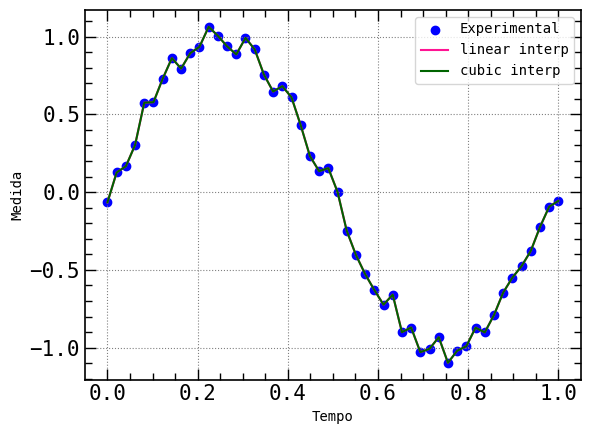

In [13]:
plt.scatter(measured_time, measures, color = 'blue', label = 'Experimental')
plt.plot(measured_time, linear_results, color = 'deeppink', label = 'linear interp')
plt.plot(measured_time, cubic_results, color = 'darkgreen', label = 'cubic interp')
plt.xlabel('Tempo')
plt.ylabel('Medida')
plt.legend(loc = 'best')
sm_style()

O método `scipy.interpolate.interp2d` é semelhante ao `scipy.interpolate.interp1d`, mas para matrizes 2D. Note que, para a família `interp`, os pontos de interpolação devem permanecer dentro do intervalo de determinados pontos de dados. 

---

## 3. Otimização

O módulo `scipy.optimize` fornece algoritmos para minimização de função (escalar ou multidimensional), ajuste de curva e localização de raiz.

- Ajuste de curvas (fit):

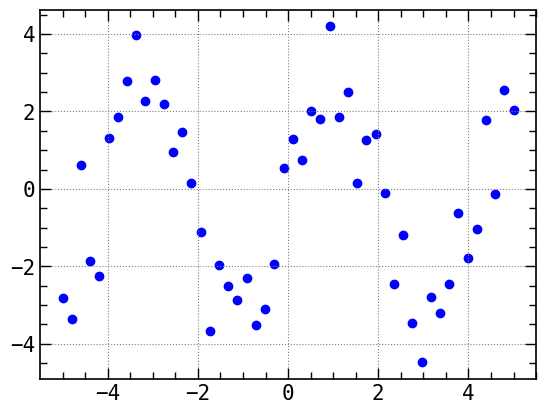

In [14]:
x_data = np.linspace(-5, 5, num = 50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size = 50)

plt.scatter(x_data, y_data, color = 'b')
sm_style()

Se soubermos que os dados estão em uma onda senoidal, mas não as amplitudes ou o período, podemos encontrá-los pelo ajuste da curva de mínimos quadrados. Primeiro temos que definir a função de teste para ajustar, aqui um seno com amplitude e período desconhecidos:

In [15]:
def test_func(x, a, b):
    return a * np.sin(b * x)

Em seguida, usamos `scipy.optimize.curve_fit()` para encontrar $a$ e $b$:

In [16]:
from scipy import optimize

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0 = [2, 2])
print(params)

[2.99472179 1.49386609]


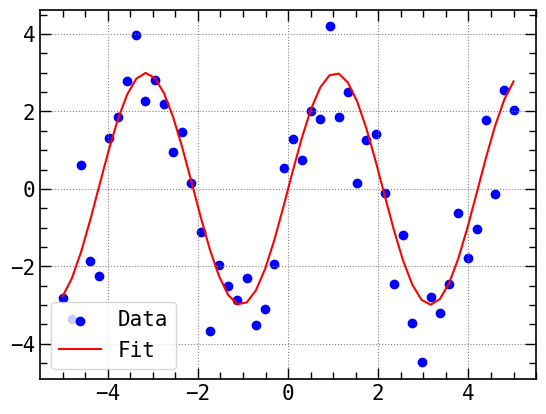

In [17]:
plt.scatter(x_data, y_data, color = 'b', label = 'Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]), color = 'r', label = 'Fit')
plt.legend(loc = 'best')
sm_style()

- Mínimo de uma função escalar:

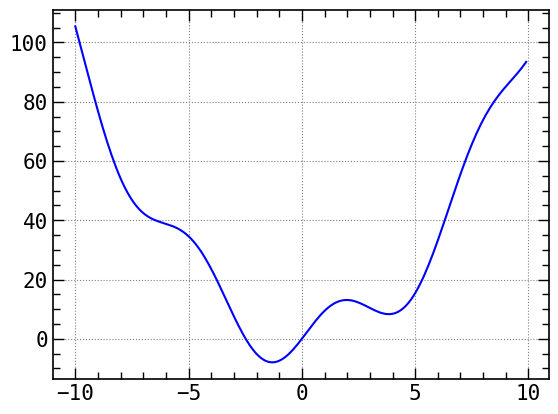

In [18]:
def f(x):
    return x**2 + 10*np.sin(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x), color = 'b') 
sm_style()

Esta função tem um mínimo global em torno de $-1.3$ e um mínimo local em torno de $3.8$.

A busca pelo mínimo pode ser feita através do método `scipy.optimize.minimize()`, dado um ponto inicial `x0`, ele retorna a localização do mínimo que encontrou:

In [19]:
result = optimize.minimize(f, x0 = 0)
result 

      fun: -7.945823375615215
 hess_inv: array([[0.08589237]])
      jac: array([-1.1920929e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644012])

Note que custou apenas a avaliação de 12 funções acima para encontrar um bom valor para o mínimo.

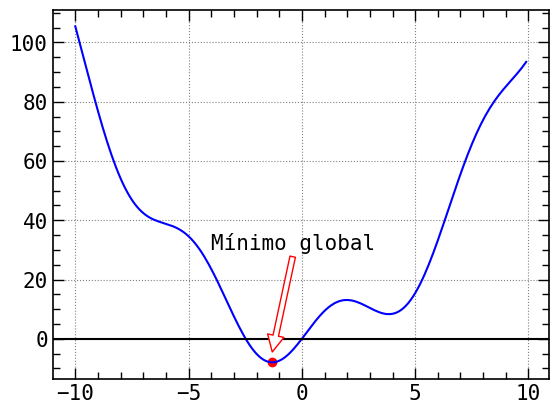

In [20]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x), color = 'b') 
plt.scatter(result.x, f(result.x), color = 'r')
plt.axhline(0., color = 'k')
plt.annotate('Mínimo global', xy = (result.x, f(result.x) + 3.5), xytext = (-4, 30),
            arrowprops = dict(facecolor = 'white', lw = 1, edgecolor = 'red'))
sm_style()

In [21]:
optimize.minimize?

- Raízes de uma função escalar:

Para encontrar uma raiz, ou seja, um ponto onde $f(x)=0$, da função $f$ podemos usar o método `scipy.optimize.root()`:

In [22]:
root = optimize.root(f, x0 = 1)  
root 

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.33310463e-32])
       r: array([-10.])
  status: 1
 success: True
       x: array([0.])

Observe que apenas uma raiz é encontrada. A inspeção do gráfico de $f$ revela que há uma segunda raiz em torno de $-2.5$. Encontramos o valor exato ajustando nosso palpite inicial:

In [23]:
root2 = optimize.root(f, x0 = -2.5)
root2

    fjac: array([[-1.]])
     fun: array([-1.77635684e-15])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-4.42496706e-10])
       r: array([12.84593])
  status: 1
 success: True
       x: array([-2.47948183])

Agora que encontramos os mínimos e as raízes de `f` e usamos o ajuste de curva nele, reunimos todos esses resultados em um único gráfico:

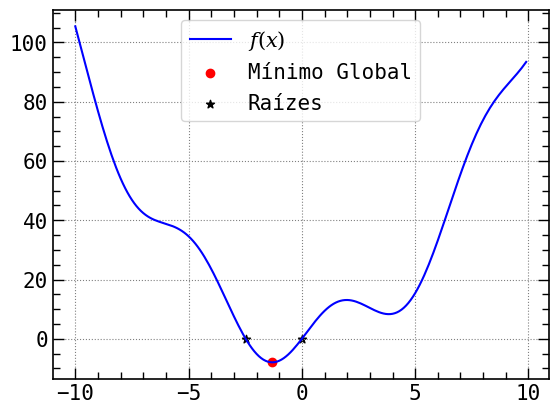

In [24]:
plt.plot(x, f(x), color = 'b', label = r'$f(x)$') 
plt.scatter(result.x, f(result.x), color = 'r', label = 'Mínimo Global')
plt.scatter(root.x, f(root.x), marker = '*', color = 'k', label = 'Raízes')
plt.scatter(root2.x, f(root2.x), marker = '*', color = 'k')
plt.legend(loc = 'best')
sm_style()

---

## 4. Estatística e Números Aleatórios

- Distribuições:

Dadas as observações de um processo aleatório, seu histograma é um estimador do PDF do processo aleatório (função de densidade de probabilidade):

In [25]:
samples = np.random.normal(size = 1000)
bins = np.arange(-4, 5)
bins

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [26]:
histogram = np.histogram(samples, bins = bins, density = True)[0]
bins = 0.5*(bins[1:] + bins[:-1])
bins

array([-3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5])

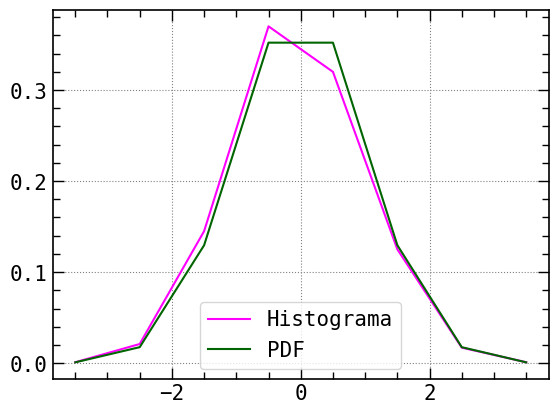

In [27]:
from scipy import stats
pdf = stats.norm.pdf(bins)

plt.plot(bins, histogram, color = 'fuchsia', label = 'Histograma') 
plt.plot(bins, pdf, color = 'darkgreen', label = 'PDF') 
plt.legend(loc = 'best')
sm_style()

Se sabemos que o processo aleatório pertence a uma determinada família de processos aleatórios, como processos normais, podemos fazer um ajuste de máxima verossimilhança das observações para estimar os parâmetros da distribuição subjacente. Aqui ajustamos um processo normal aos dados observados:

In [28]:
loc, std = stats.norm.fit(samples)
loc 

-0.07684736035438666

- Média, Mediana e Percentil:

> A média é um estimador do centro da distribuição.

> A mediana outro estimador do centro. É o valor com metade das observações abaixo, e metade acima.

> A mediana também é o percentil $50$, pois $50\%$ das observações estão abaixo dela. De maneira semelhante podemos calcular o percentil $90$, por exemplo.

In [29]:
print('Média =', np.mean(samples))
print('Mediana =', np.median(samples))
print('Percentil =', stats.scoreatpercentile(samples, 50))

Média = -0.07684736035438666
Mediana = -0.09167538857531207
Percentil = -0.09167538857531207


- Testes estatísticos:

Um teste estatístico é um indicador de decisão. Por exemplo, se tivermos dois conjuntos de observações, que assumimos serem gerados a partir de processos Gaussianos, podemos usar um teste $T$ para decidir se as médias de dois conjuntos de observações são significativamente diferentes:

In [30]:
a = np.random.normal(0, 1, size = 100)
b = np.random.normal(1, 1, size = 100)
stats.ttest_ind(a, b)  

Ttest_indResult(statistic=-7.820259634244811, pvalue=3.0694587341087715e-13)

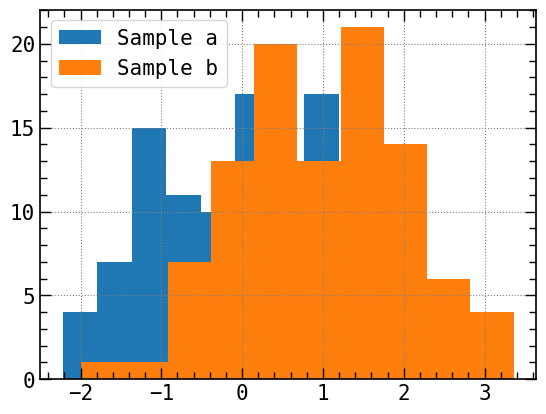

In [31]:
plt.hist(a, label = 'Sample a')
plt.hist(b, label = 'Sample b')
plt.legend(loc = 'best')
sm_style()

A saída é composta por:

- O valor da estatística $T$: é um número cujo sinal é proporcional à diferença entre os dois processos aleatórios e a magnitude está relacionada com a significância dessa diferença.

- O valor de $p$: a probabilidade de ambos os processos serem idênticos. Se for próximo de $1$, os dois processos são quase certamente idênticos. Quanto mais próximo de zero, mais provável é que os processos tenham meios diferentes.

---

## 5. Integração numérica

- Funções integrais:

A rotina de integração mais genérica é o método de quadratura `scipy.integrate.quad()`. Vamos calcular a integral abaixo:

$$I=\int_0^{\pi / 2} \sin{(t)} \text{ d}t$$

In [32]:
from scipy.integrate import quad
import scipy.integrate

res, err = quad(np.sin, 0, np.pi/2)
print('I =', res, '+/-', err)

I = 0.9999999999999999 +/- 1.1102230246251564e-14


Existem outros métodos de integração disponíveis no `Scipy`:

In [33]:
scipy.integrate?

- Integrando equações diferenciais:

O módulo `scipy.integrate` também apresenta rotinas para integração de Equações Diferenciais Ordinárias (EDO). Em particular, o módulo `scipy.integrate.odeint()` resolve EDOs da forma:

```Python
dy/dt = rhs(y1, y2, .., t0,...)
```

Como exemplo, vamos resolver a EDO abaixo. Primeiro definimos a função que calcula a derivada da posição precisa ser definida:

$$\frac{dy}{dt}=-2y,\text{ }t\in[0,4]\quad; \quad y(t=0)=1.$$

In [34]:
def calc_derivative(ypos, time):
    return -2 * ypos

Então, calculamos `y` como uma função do tempo:

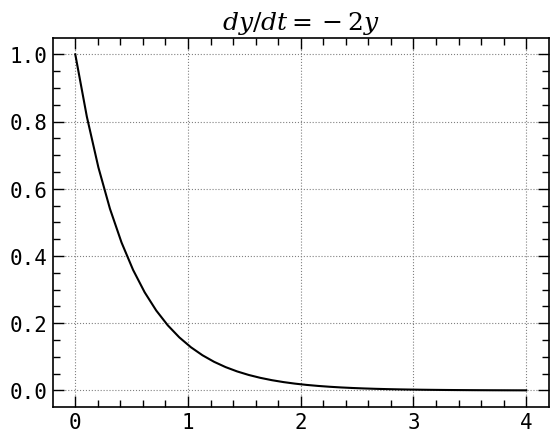

In [35]:
from scipy.integrate import odeint
time_vec = np.linspace(0, 4, 40)
y = odeint(calc_derivative, y0 = 1, t = time_vec)

plt.plot(time_vec, y, color = 'k')
plt.title('$dy/dt=-2y$')
sm_style()

Vamos tentar uma EDO mais complexa como a do oscilador harmônico amortecido:

$$y''+2\varepsilon\omega_0 y'+\omega_0^2 y=0\quad;\quad \omega_0^2=\frac{k}{m}\text{ }\wedge\text{ }\varepsilon=\frac{c}{2m\omega_0}$$

In [36]:
mass = 0.5  # [m] = kg
kspring = 4  # [k] = N/m
cviscous = 0.4  # [c] = N * s/m

eps = cviscous / (2 * mass * np.sqrt(kspring/mass))
omega = np.sqrt(kspring / mass)

print(eps)

0.1414213562373095


O sistema é subamortecido!

Para a função `odeint()`, a equação de 2ª ordem precisa ser transformada em um sistema de duas equações de primeira ordem para o vetor $Y = (y, y')$: 

In [37]:
def calc_deri(yvec, time, eps, omega):
    return (yvec[1], -2.0 * eps * omega * yvec[1] - omega **2 * yvec[0])

Integrando o sistema:

In [38]:
time_vec = np.linspace(0, 10, 100)
yinit = (1, 0)
yarr = odeint(calc_deri, yinit, time_vec, args = (eps, omega))

Plotando as duas funções:

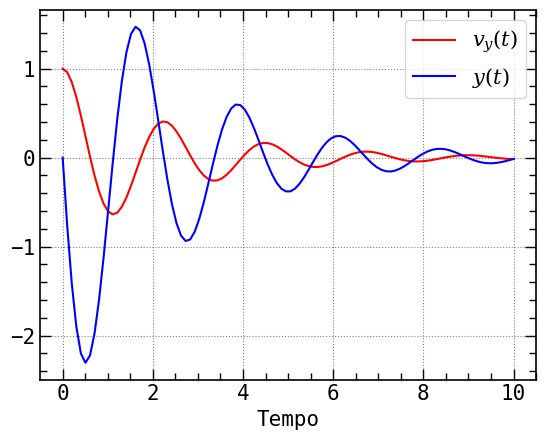

In [39]:
plt.plot(time_vec, yarr[:, 0], color = 'red', label = r'$v_y(t)$')
plt.plot(time_vec, yarr[:, 1], color = 'blue', label = r'$y(t)$')
plt.xlabel('Tempo')
plt.legend(loc = 'best')
sm_style()

O módulo `scipy.integrate.odeint()` usa o LSODA (*Livermore Solver* para equações diferenciais ordinárias com troca automática de método para problemas rígidos e não rígidos), consulte a biblioteca `ODEPACK` Fortran para obter mais detalhes.

---

## 6. Transformada Rápida de Fourier (FFT)

O módulo `scipy.fftpack` calcula as transformadas rápidas de Fourier (FFTs) e oferece utilitários para lidar com elas. As principais funções são:

- `scipy.fftpack.fft()` para calcular a FFT;
- `scipy.fftpack.fftfreq()` para gerar as frequências de amostragem;
- `scipy.fftpack.ifft()` calcula a FFT inversa, do espaço de frequência para o espaço de sinal.

Vamos gerar um sinal ruidoso:

In [40]:
from scipy import fftpack

np.random.seed(1234)

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig = (np.sin(2 * np.pi / period * time_vec)
       + 0.5 * np.random.randn(time_vec.size))

Agora vamos aplicar a FFT em nosso sinal, traçar o espectro de potência do mesmo e encontrar a frequência de pico: 

In [41]:
sig_fft = fftpack.fft(sig)

power = np.abs(sig_fft)**2
sample_freq = fftpack.fftfreq(sig.size, d = time_step)

pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

Então removemos todas as altas frequências e transformamos de volta as frequências em um sinal:

In [42]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

Vamos agora juntar tudo isso em um único plot:

<IPython.core.display.Javascript object>


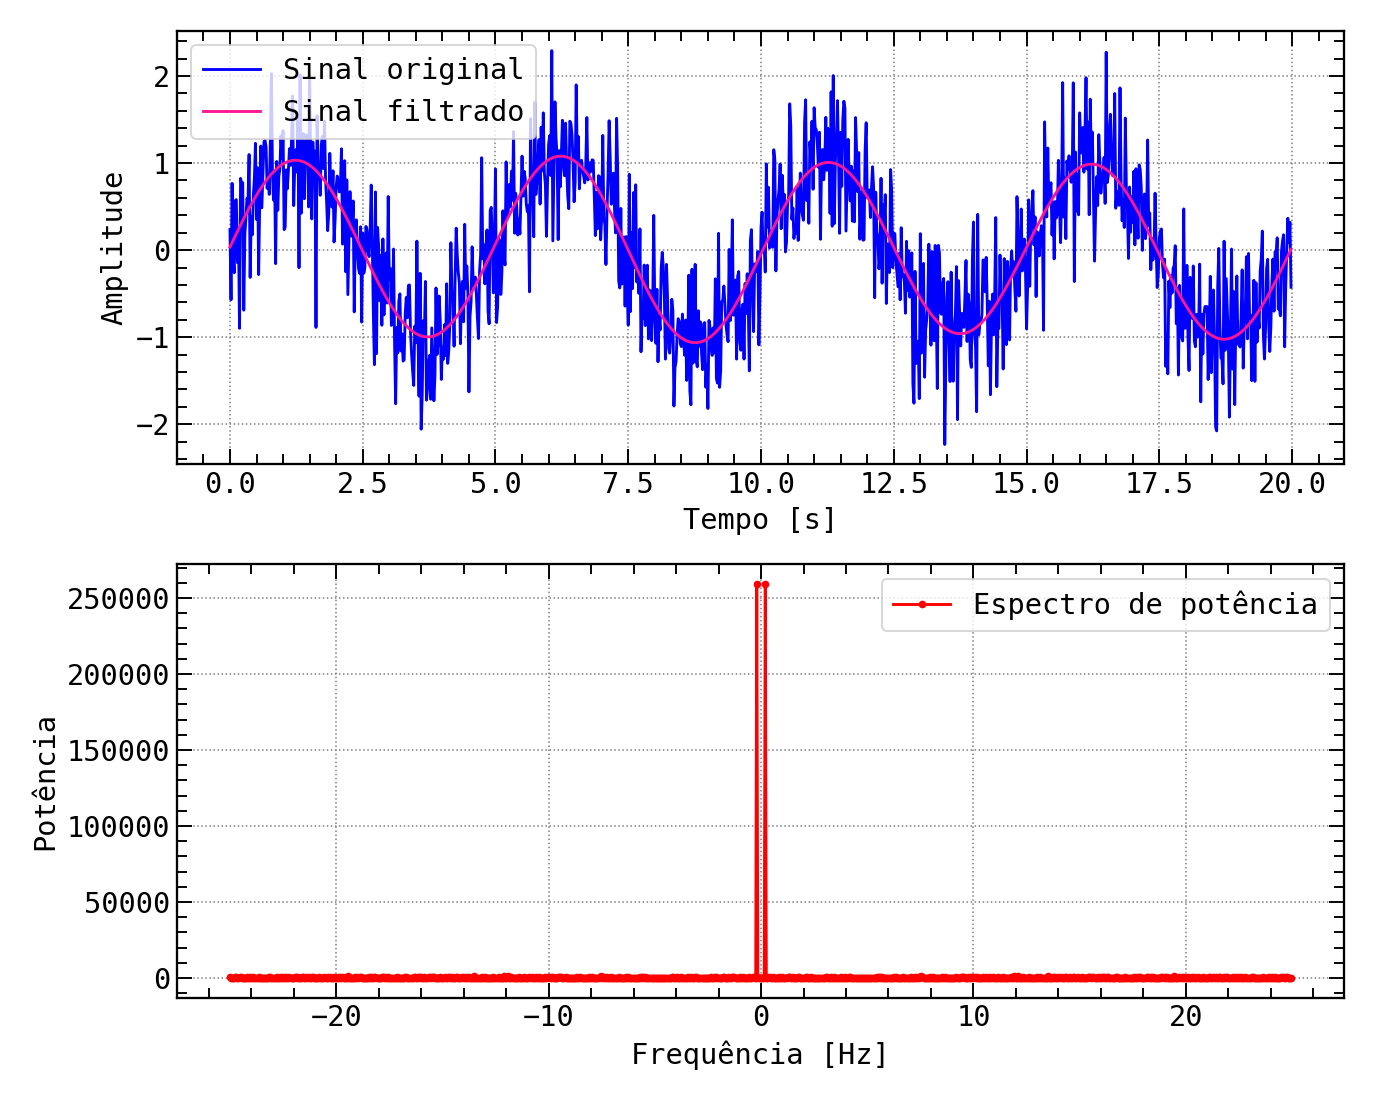

C:\Users\Gabriel Wendell\AppData\Roaming\Python\Python39\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [43]:
%matplotlib notebook
fig = plt.figure(figsize = (10, 8))

ax1 = plt.subplot(2,1,1)
sm_style()

ax1.plot(time_vec, sig, color = 'b', label = 'Sinal original')
ax1.plot(time_vec, filtered_sig, color = 'deeppink', label = 'Sinal filtrado')
ax1.set_xlabel('Tempo [s]', {'color': 'k','fontsize': 15})
ax1.set_ylabel('Amplitude', {'color': 'k','fontsize': 15})
ax1.legend(loc = 'best')
plt.tight_layout()

ax2 = plt.subplot(2,1,2)
sm_style()

ax2.plot(sample_freq, power, '.-', color = 'r', label = 'Espectro de potência')
ax2.set_xlabel('Frequência [Hz]',{'color': 'k','fontsize': 15})
ax2.set_ylabel('Potência', {'color': 'k','fontsize': 15})
# ax2.set_yscale('log')
ax2.legend(loc = 'best')
plt.tight_layout()

---

## 7. Processamento de sinais

O módulo `scipy.signal` é para processamento de sinal típico do tipo 1D, sinais regularmente amostrados.

In [44]:
from scipy import signal

- Reamostragem um sinal para $n$ pontos usando FFT:

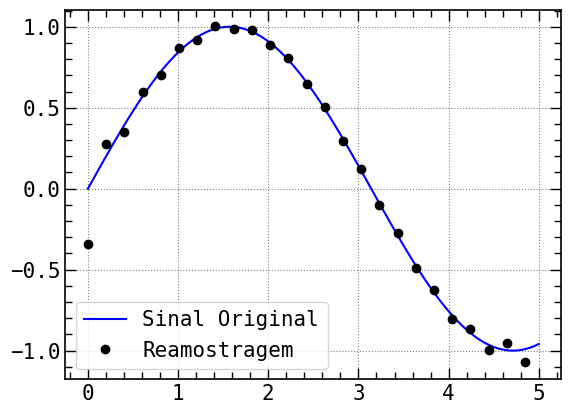

In [45]:
%matplotlib inline
t = np.linspace(0, 5, 100)
x = np.sin(t)

x_resampled = signal.resample(x, 25)

plt.plot(t, x, 'b-', label = 'Sinal Original') 
plt.plot(t[::4], x_resampled, 'ko', label = 'Reamostragem')
plt.legend(loc = 'best')
sm_style()

Observe como na lateral da janela a reamostragem é menos precisa e tem um efeito de ondulação. Essa reamostragem é diferente da interpolação fornecida por `scipy.interpolate`, pois ela se aplica apenas a dados amostrados regularmente.

- Remoção de uma tendência linear:

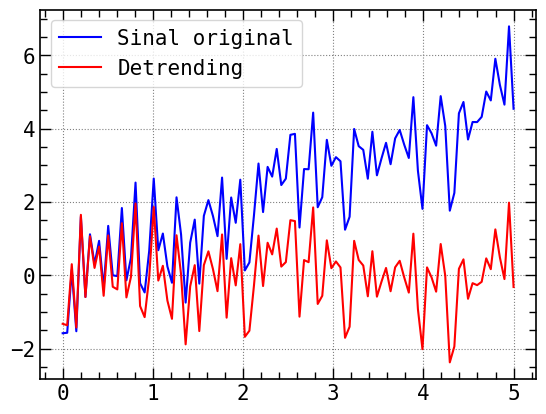

In [46]:
from scipy import signal

t = np.linspace(0, 5, 100)
x = t + np.random.normal(size = 100)

x_detrended = signal.detrend(x)

plt.plot(t, x, 'b-', label = 'Sinal original')
plt.plot(t, x_detrended, 'r-', label = 'Detrending')
plt.legend(loc = 'best')
sm_style()

- Filtragem:

Para filtragem não linear, `scipy.signal` tem o módulo `filtering` (filtro mediano `scipy.signal.medfilt()`, Wiener `scipy.signal.wiener())`, mas discutiremos isso na seção de imagens.

- Análise espectral:

O método `scipy.signal.spectrogram()` calcula um espectrograma (ou seja, espectros de frequência em janelas de tempo consecutivas), enquanto `scipy.signal.welch()` calcula uma densidade de espectro de potência (PSD).

In [47]:
np.random.seed(0)

time_step = .01
time_vec = np.arange(0, 70, time_step)

# Sinal
sig = np.sin(0.5 * np.pi * time_vec * (1 + .1 * time_vec))

# Espectrograma
freqs, times, spectrogram = signal.spectrogram(sig)

# PSD
freqs, psd = signal.welch(sig)

Vamos juntar todas essas informações em um único plot:

<IPython.core.display.Javascript object>


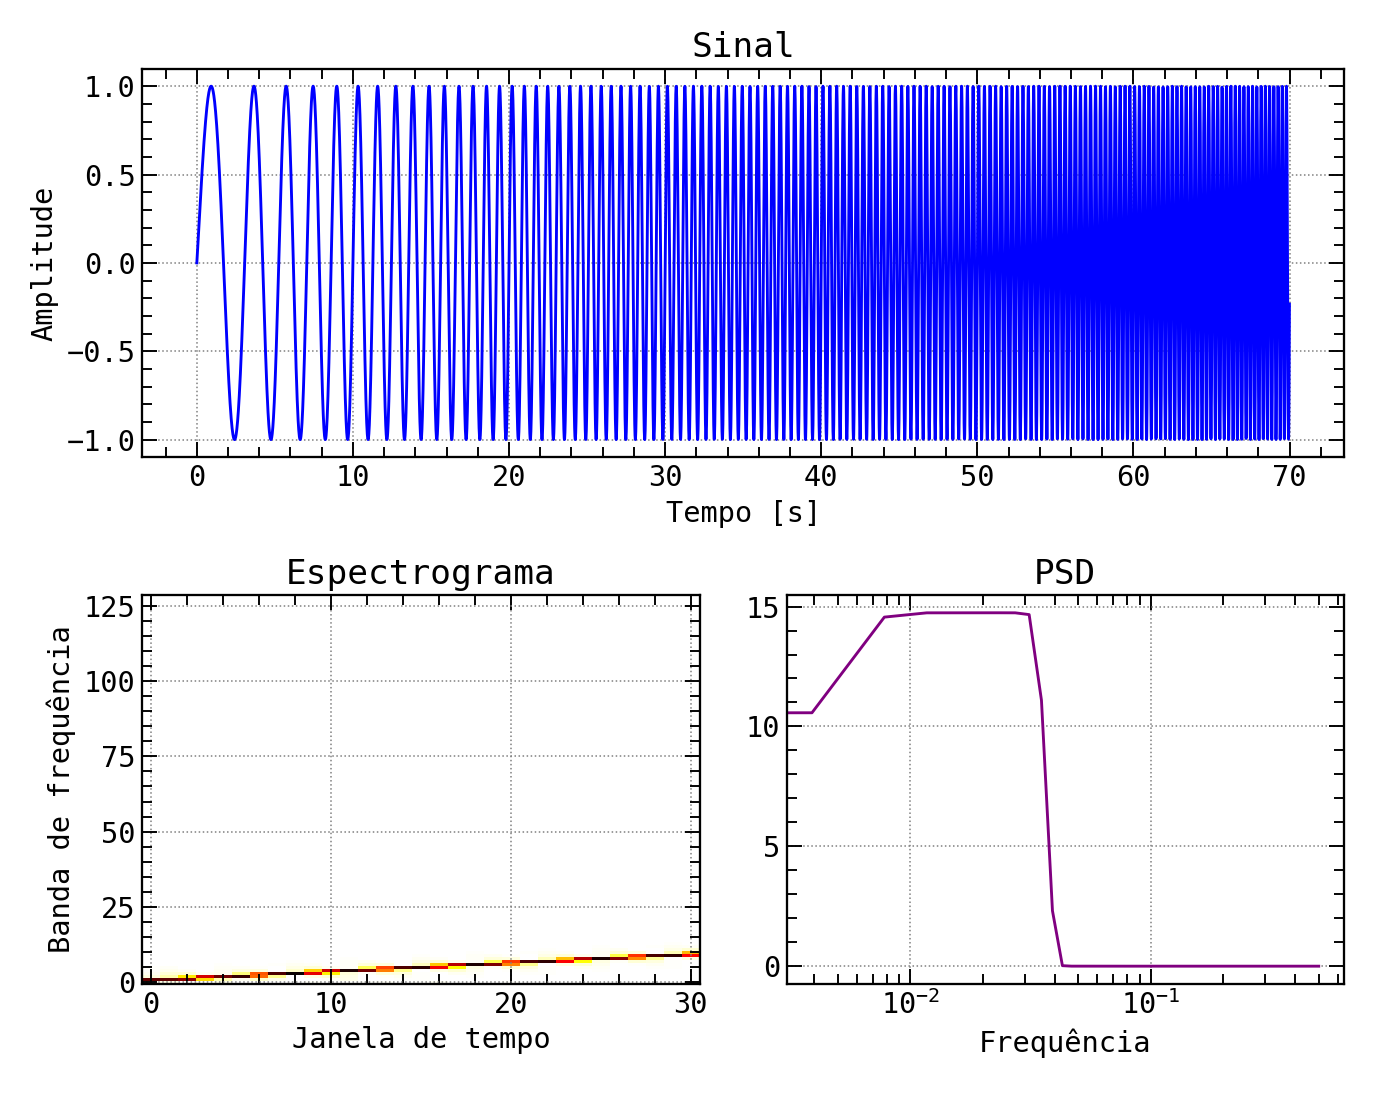

In [48]:
%matplotlib notebook
fig = plt.figure(figsize = (10, 8))

ax1 = plt.subplot(2,1,1)
sm_style()

ax1.plot(time_vec, sig, color = 'blue')
ax1.set_xlabel('Tempo [s]')
ax1.set_ylabel('Amplitude')
ax1.set_title('Sinal')
plt.tight_layout()

ax2 = plt.subplot(2,2,3)
sm_style()

ax2.imshow(spectrogram, aspect = 'auto', cmap = 'hot_r', origin = 'lower')
ax2.set_xlabel('Janela de tempo')
ax2.set_ylabel('Banda de frequência')
ax2.set_title('Espectrograma')
plt.tight_layout()
# ax2.set_yscale('log')

ax3 = plt.subplot(2,2,4)
ax3.semilogx(freqs, psd, color = 'purple')
ax3.set_xlabel('Frequência')
ax3.set_title('PSD')
plt.tight_layout()
sm_style()

---

## 8. Manipulação de imagens

O módulo `scipy.ndimage` fornece manipulação de matrizes $n$-dimensionais como imagens.

In [49]:
from scipy import ndimage
from scipy import misc 

- Transformações geométricas em imagens:

In [50]:
face = misc.face(gray = True)

shifted_face = ndimage.shift(face, (50, 50))
shifted_face2 = ndimage.shift(face, (50, 50), mode = 'nearest')
rotated_face = ndimage.rotate(face, 30)
cropped_face = face[50:-50, 50:-50]
zoomed_face = ndimage.zoom(face, 2)
zoomed_face.shape

(1536, 2048)

<IPython.core.display.Javascript object>


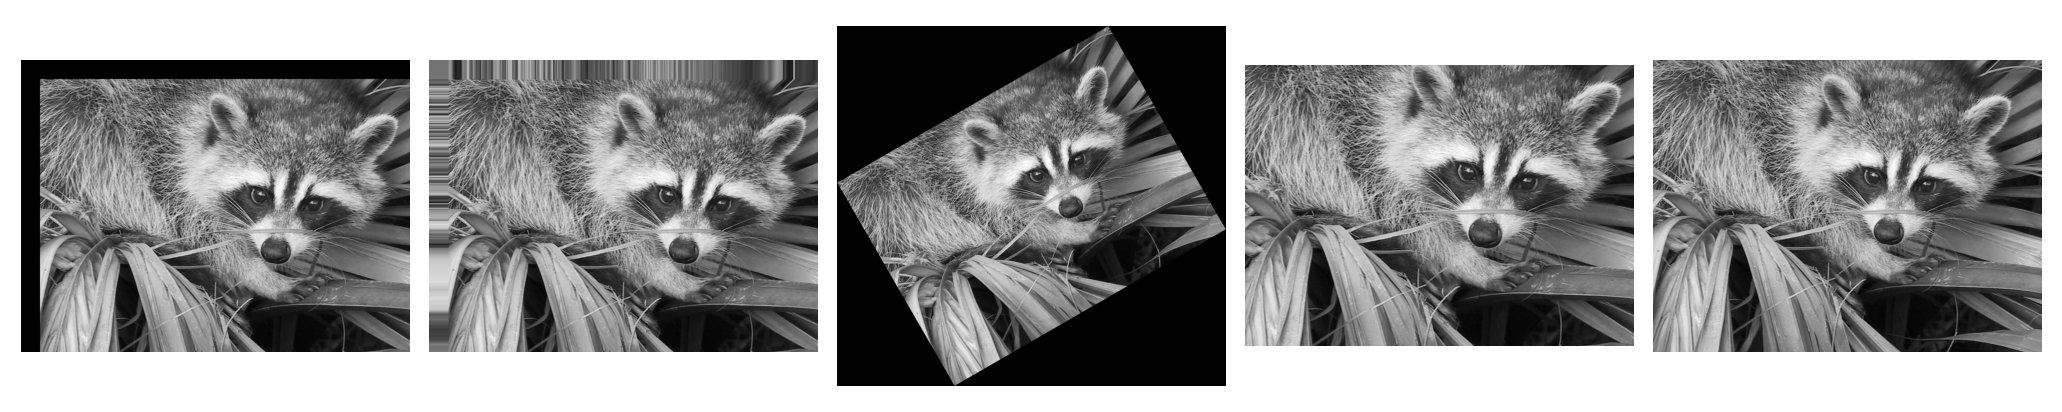

In [51]:
plt.figure(figsize = (15, 3))
plt.subplot(151)
plt.imshow(shifted_face, cmap = plt.cm.gray)
plt.axis('off')

plt.subplot(152)
plt.imshow(shifted_face2, cmap = plt.cm.gray)
plt.axis('off')

plt.subplot(153)
plt.imshow(rotated_face, cmap = plt.cm.gray)
plt.axis('off')

plt.subplot(154)
plt.imshow(cropped_face, cmap = plt.cm.gray)
plt.axis('off')

plt.subplot(155)
plt.imshow(zoomed_face, cmap = plt.cm.gray)
plt.axis('off')

plt.subplots_adjust(wspace = .05, left=.01, bottom = .01, right = .99, top = .99)

- Filtro de imagens:

In [52]:
noisy_face = np.copy(face).astype(float)
noisy_face += face.std() * 0.5 * np.random.standard_normal(face.shape)

blurred_face = ndimage.gaussian_filter(noisy_face, sigma = 3)
median_face = ndimage.median_filter(noisy_face, size = 5)
wiener_face = signal.wiener(noisy_face, (5, 5))

<IPython.core.display.Javascript object>


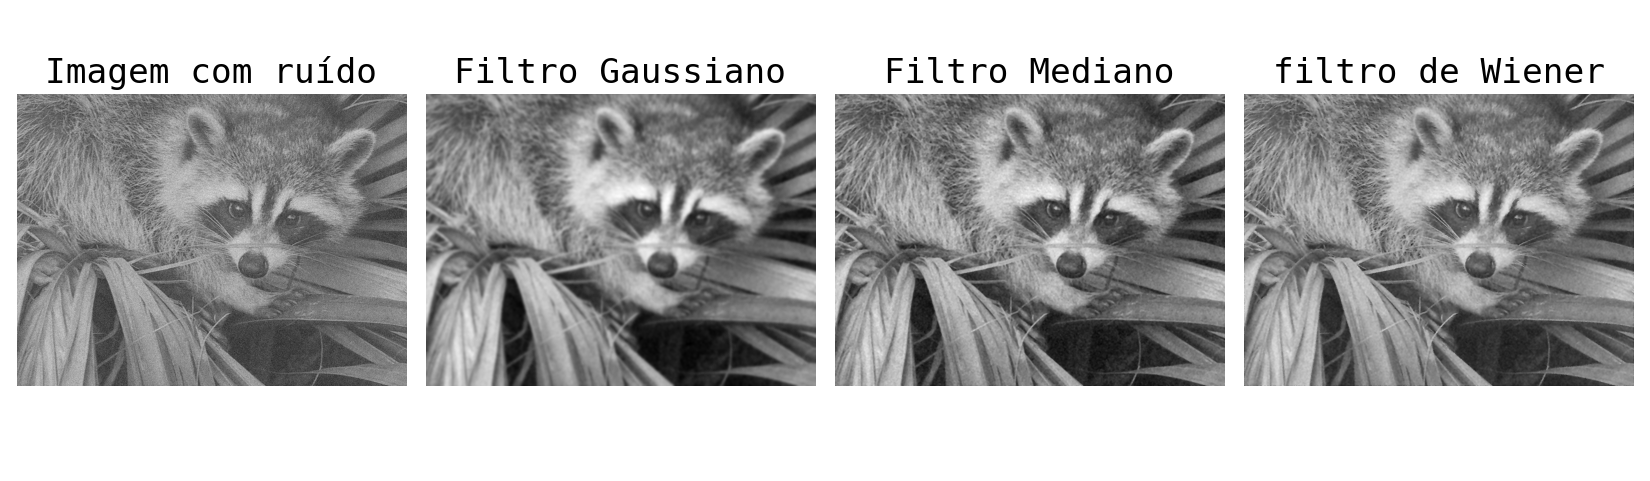

In [53]:
plt.figure(figsize = (12, 3.5))
plt.subplot(141)
plt.imshow(noisy_face, cmap = plt.cm.gray)
plt.axis('off')
plt.title('Imagem com ruído')

plt.subplot(142)
plt.imshow(blurred_face, cmap = plt.cm.gray)
plt.axis('off')
plt.title('Filtro Gaussiano')

plt.subplot(143)
plt.imshow(median_face, cmap = plt.cm.gray)
plt.axis('off')
plt.title('Filtro Mediano')

plt.subplot(144)
plt.imshow(wiener_face, cmap=plt.cm.gray)
plt.title('filtro de Wiener')
plt.axis('off')

plt.subplots_adjust(wspace = .05, left = .01, bottom = .01, right = .99, top = .99)

- Morfologia Matemática:

A morfologia matemática deriva da teoria dos conjuntos. Caracteriza e transforma estruturas geométricas. As imagens binárias (preto e branco), em particular, podem ser transformadas usando esta teoria: os conjuntos a serem transformados são os conjuntos de pixels vizinhos com valor diferente de zero. A teoria também foi estendida para imagens com valores de cinza.

![image](https://scipy-lectures.org/_images/morpho_mat1.png)

As operações matemático-morfológicas utilizam um elemento estruturante para modificar estruturas geométricas.

Vamos primeiro gerar um elemento estruturante:

In [54]:
el = ndimage.generate_binary_structure(2, 1)
el

array([[False,  True, False],
       [ True,  True,  True],
       [False,  True, False]])

**Erosão**: `scipy.ndimage.binary_erosion()`

In [55]:
a = np.zeros((7, 7), dtype = int)
a[1:6, 2:5] = 1
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [56]:
ndimage.binary_erosion(a).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [57]:
ndimage.binary_erosion(a, structure = np.ones((5,5))).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

**Dilatação**: `scipy.ndimage.binary_dilation()`

In [58]:
a = np.zeros((5, 5))
a[2, 2] = 1
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [59]:
ndimage.binary_dilation(a).astype(a.dtype)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.]])

**Abertura**: `scipy.ndimage.binary_opening()`

In [60]:
a = np.zeros((5, 5), dtype = int)
a[1:4, 1:4] = 1
a[4, 4] = 1
a

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 1]])

A abertura remove pequenos objetos:

In [61]:
ndimage.binary_opening(a, structure = np.ones((3, 3))).astype(int)

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]])

A abertura também pode suavizar cantos:

In [62]:
ndimage.binary_opening(a).astype(int)

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]])

**Fechamento**: `scipy.ndimage.binary_closing()`

Uma operação de abertura remove pequenas estruturas, enquanto uma operação de fechamento preenche pequenos orifícios. Tais operações podem, portanto, ser usadas para “limpar” uma imagem.

In [63]:
a = np.zeros((50, 50))
a[10:-10, 10:-10] = 1
a += 0.25 * np.random.standard_normal(a.shape)
mask = a >= 0.5
opened_mask = ndimage.binary_opening(mask)
closed_mask = ndimage.binary_closing(opened_mask)

<IPython.core.display.Javascript object>


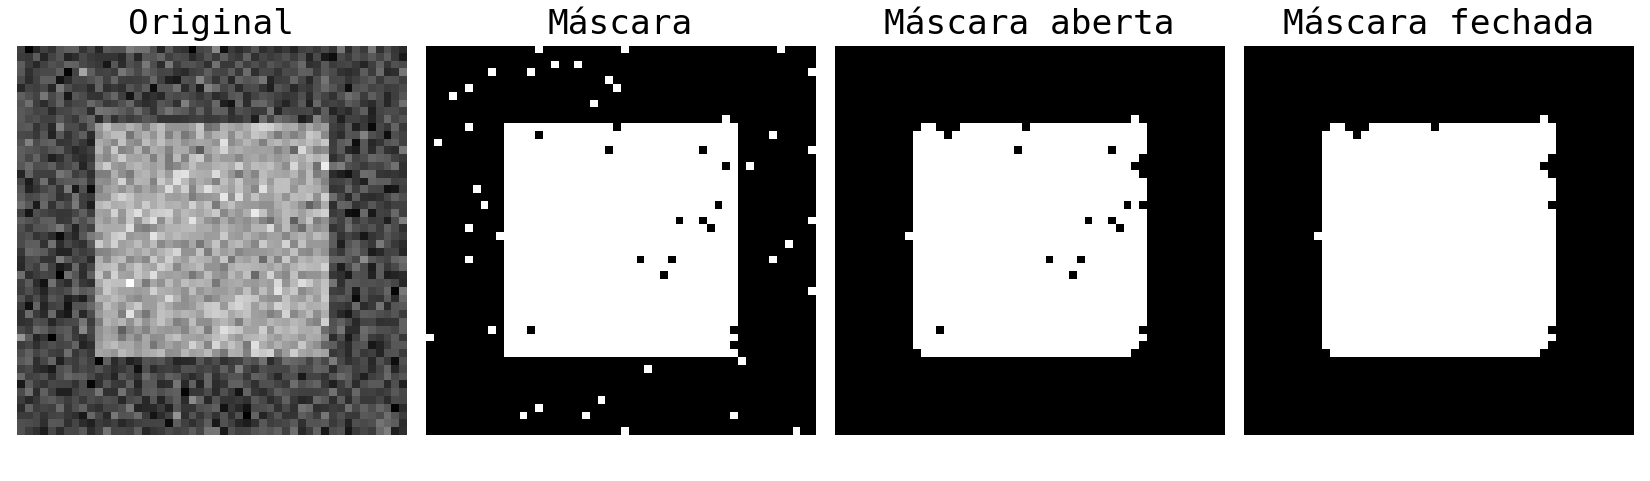

In [64]:
plt.figure(figsize = (12, 3.5))
plt.subplot(141)
plt.imshow(a, cmap = plt.cm.gray)
plt.axis('off')
plt.title('Original')

plt.subplot(142)
plt.imshow(mask, cmap = plt.cm.gray)
plt.axis('off')
plt.title('Máscara')

plt.subplot(143)
plt.imshow(opened_mask, cmap = plt.cm.gray)
plt.axis('off')
plt.title('Máscara aberta')

plt.subplot(144)
plt.imshow(closed_mask, cmap = plt.cm.gray)
plt.title('Máscara fechada')
plt.axis('off')

plt.subplots_adjust(wspace = .05, left = .01, bottom = .01, right = .99, top = .99)

Para imagens com *valores de cinza*, a erosão (resp. dilatação) equivale a substituir um pixel pelo valor mínimo (resp. máximo) entre os pixels cobertos pelo elemento estruturante centrado no pixel de interesse.

In [65]:
a = np.zeros((7, 7), dtype = int)
a[1:6, 1:6] = 3
a[4, 4] = 2; a[2, 3] = 1
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 3, 3, 3, 3, 3, 0],
       [0, 3, 3, 1, 3, 3, 0],
       [0, 3, 3, 3, 3, 3, 0],
       [0, 3, 3, 3, 2, 3, 0],
       [0, 3, 3, 3, 3, 3, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [66]:
ndimage.grey_erosion(a, size = (3, 3))

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 3, 2, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

- Componentes conectados e medições em imagens:

In [67]:
np.random.seed(0)
x, y = np.indices((100, 100))
sig = np.sin(2*np.pi*x/50.) * np.sin(2*np.pi*y/50.) * (1+x*y/50.**2)**2
mask = sig > 1

labels, nb = ndimage.label(mask)
sl = ndimage.find_objects(labels == 4)

<IPython.core.display.Javascript object>


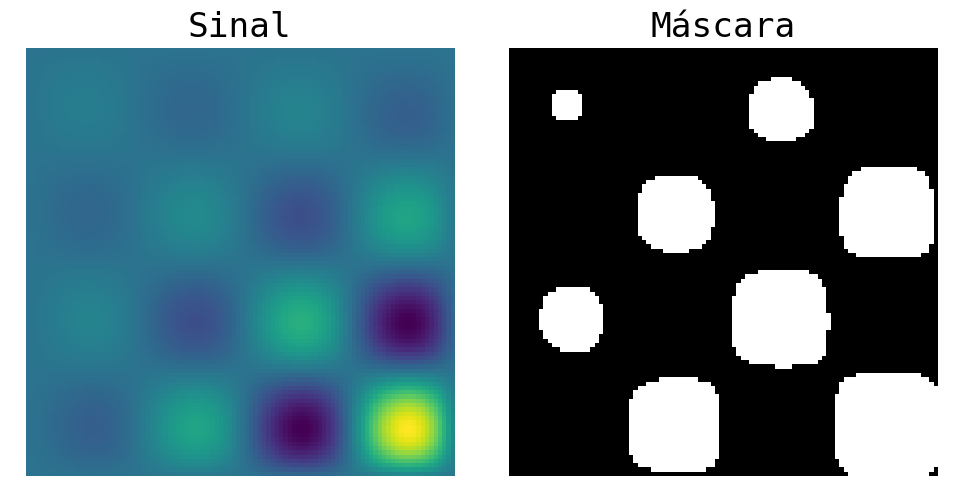

In [68]:
plt.figure(figsize = (7, 3.5))
plt.subplot(1, 2, 1)
plt.imshow(sig)
plt.axis('off')
plt.title('Sinal')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap = plt.cm.gray)
plt.axis('off')
plt.title('Máscara')
plt.subplots_adjust(wspace = .05, left = .01, bottom = .01, right = .99, top = .9)

<IPython.core.display.Javascript object>


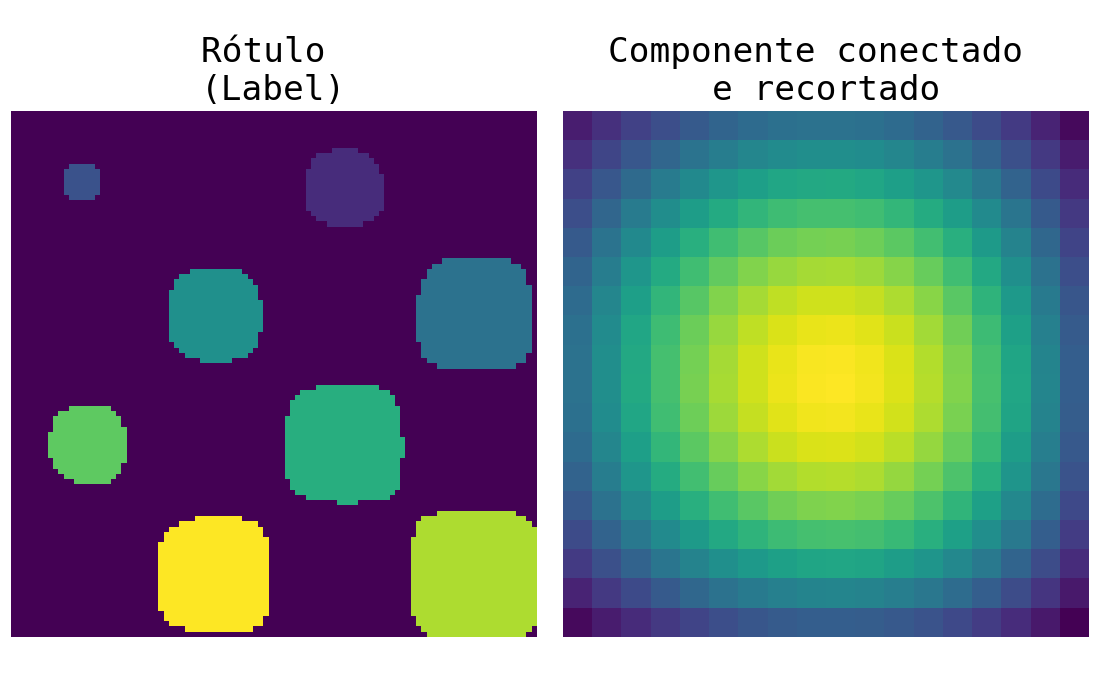

In [69]:
plt.figure(figsize = (8, 5))
plt.subplot(1, 2, 1)
plt.imshow(labels)
plt.title('Rótulo \n(Label)')
plt.axis('off')
plt.subplots_adjust(wspace = .05, left = .01, bottom = .01, right = .99, top = .9)

plt.subplot(1, 2, 2)
plt.imshow(sig[sl[0]])
plt.title('Componente conectado \ne recortado')
plt.axis('off')
plt.subplots_adjust(wspace = .05, left = .01, bottom = .01, right = .99, top = .9)

---

![image](https://c.tenor.com/hEOM8E4epvgAAAAC/hahaha-thats-all-folks.gif)